Name: Zachary Uson

Course: Machine Learning Specialist Professional - EDA

# COURSE PROJECT

This project uses a heart attack analysis dataset. The dataset contains the following information:

-Age : Age of the patient

-Sex : Sex of the patient

-exang : exercise induced angina (1 = yes; 0 = no)

-caa : number of major vessels (0-3)

-cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic

-trtbps : resting blood pressure (in mm Hg)

-chol : cholestoral in mg/dl fetched via BMI sensor

-fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

-restecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
 
-thalach : maximum heart rate achieved

-slp : slope

-thall : thal rate

-oldpeak : previous peak


-output : 0= less chance of heart attack 1= more chance of heart attack

In [21]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom

%matplotlib inline

In [2]:
# Read our data file
filepath = "heart.csv"
data = pd.read_csv(filepath)
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


---
## EXPLORATORY DATA ANALYSIS (EDA)
---

Some general information on the data using `.shape` `.columns` and `.dtypes`. Specifically, we see the names of all the features in the dataset as well as their specific types. 

In [3]:
# Number of rows
print(data.shape[0])

# Names of columns
display(data.columns.tolist())

# Data types
print(data.dtypes)

303


['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object




Using `.info` we can further examine the dataset features and examples. This one line of code encapsulates all the data we input above.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


As is evident above, the dataset includes 303 examples, of which none include NULL values. We can also determine a feature's exact column along with their data types (Note: the bottom of the information includes the total number of each data type). 

Next, we will get information about the target variable (output) along with using `.describe` to determine the mean, median, and quantiles and ranges (max-min) of ONLY age, sex, and output. This will give us information on what ages and sexes are more prone to heart attacks.

In [5]:
# Select just the rows desired from the 'describe' method and add in the 'median'
stats_df = data[['age','sex','output']].describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,age,sex,output
mean,54.366337,0.683168,0.544554
25%,47.500000,0.000000,0.000000
median,55.000000,1.000000,1.000000
75%,61.000000,1.000000,1.000000
range,48.000000,1.000000,1.000000


Visualizing 'age' may give us a better idea of how it is distributed throughout the dataset.

<AxesSubplot:xlabel='age', ylabel='Count'>

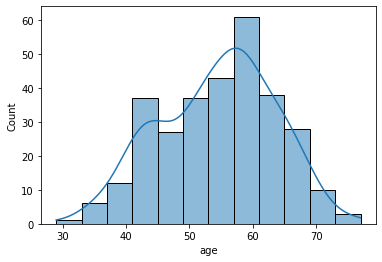

In [6]:
sns.histplot(data.age, kde=True)

The graph follows the information given from `.describe`. For example, we were told the average age in the dataset was 54 and the median was 55. Since the distribution is roughly normal, we can confirm that the true average is 54 and median is 55.

Before we go into feature engineering, let us look at the output distribution, specifically around the sexes.

In [7]:
data.output.value_counts()

1    165
0    138
Name: output, dtype: int64

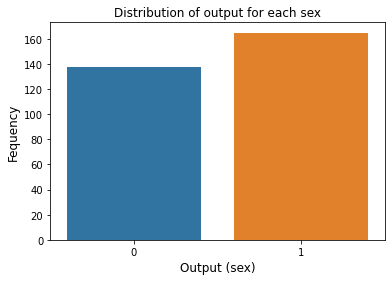

In [8]:
# 
sns.countplot(x="output", data=data)
plt.xlabel("Output (sex)", size = 12)
plt.ylabel("Fequency", size = 12)
plt.title("Distribution of output for each sex", size = 12);

---
## DATA CLEANING AND FEATURE ENGINEERING
---

To begin cleaning, let us rename columns for better understanding and then check to see if there are any outliers in our data. To do this, we will generate boxplots of only data that can be truly registered as outliers. Values such as sex, output, and chest pain include binary or ternary values that only suggest a certain condition.

In [9]:
data.rename(columns = {'cp':'chest_pain'},inplace = True )
data.rename(columns ={'exng': 'exercise_induced_angina'},inplace = True)
data.rename(columns = {'trtbps':'resting_blood_pressure'},inplace = True) 
data.rename(columns = {'fbs':'fasting_blood_sugar'},inplace = True )
data.rename(columns = {'chol':'cholesterol'},inplace = True )
data.rename(columns = {'restecg':'resting_ECG'},inplace = True )
data.rename(columns = {'thalachh':'max_heart_rate'},inplace = True )
data.rename(columns = {'slp':'ECG_slope'},inplace = True )
data.rename(columns = {'caa':'coronary_artery_abnormality'},inplace = True )
data.rename(columns = {'thall':'thalladium_test'},inplace = True )

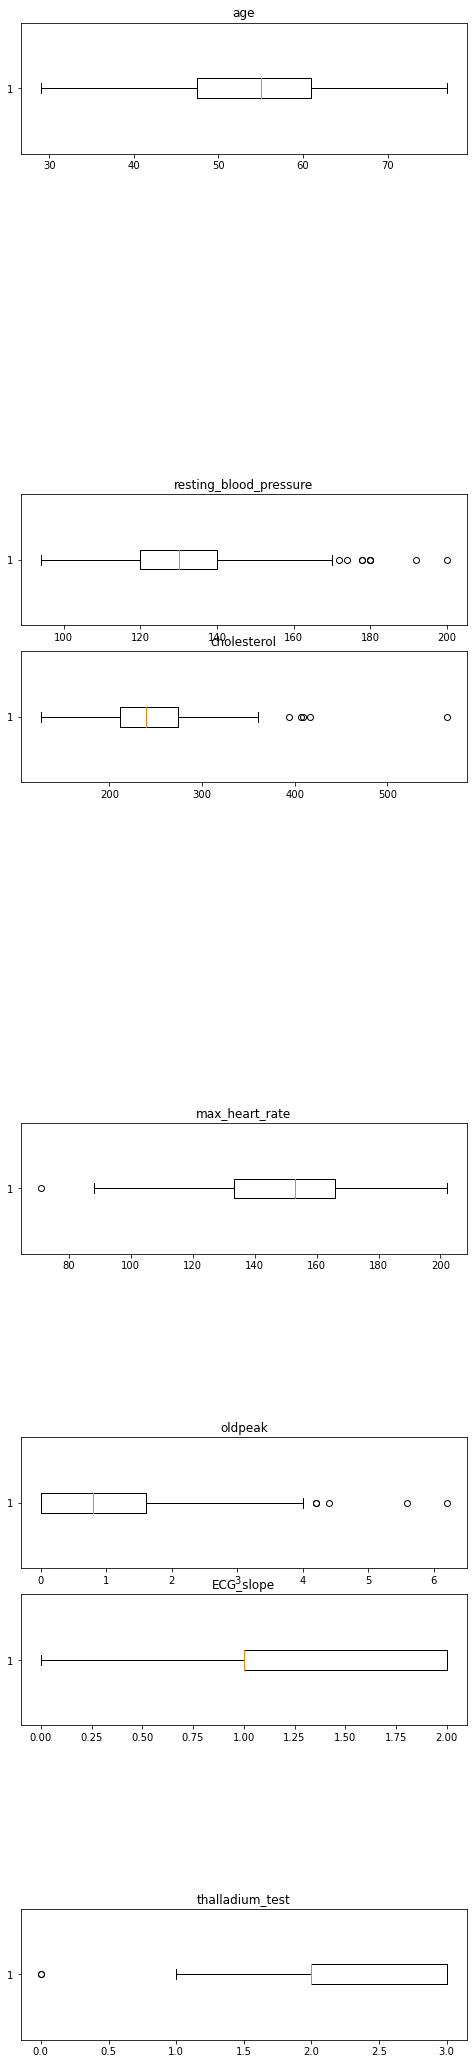

In [10]:
col = data.columns
ignore_list = ['sex','exercise_induced_angina','chest_pain','fasting_blood_sugar',\
               'resting_ECG','coronary_artery_abnormality','output']
fig, ax = plt.subplots(len(data.columns), 1, figsize = (8,40))

for ind, axi in enumerate(ax.flat):
    if col[ind] in ignore_list:
        plt.delaxes(ax[ind])
        continue
        
    axi.boxplot(data[col[ind]], vert = False)
    axi.set_title(col[ind], size = 12)

There are outliers! To deal with these we will create a function that will remove the outliers. We will accomplish this by checking if the values are over or under 1.5 and -1.5 times the IQR.

In [11]:
print("Shape before removing outliers: {}".format(data.shape))

# Removing the outliers
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
     
    global outlier_free_list
    global clean_data
 
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    clean_data = data.loc[data[col].isin(outlier_free_list)]
 

# Iterate through columns that need outliers removed
for i in data.columns:
    if i in ignore_list:
        continue
    elif i == data.columns[0]:
        removeOutliers(data, i)
    else:
        removeOutliers(clean_data, i)

# Copy the unclean data into a new variable while keeping the clean data.
original_data = data.copy()

print("Shape after removing outliers: {}".format(clean_data.shape))

Shape before removing outliers: (303, 14)
Shape after removing outliers: (277, 14)


Now let us check confirm the information of our dataset compared to before (remember the total entries was 303 and they should now be 277).

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          277 non-null    int64  
 1   sex                          277 non-null    int64  
 2   chest_pain                   277 non-null    int64  
 3   resting_blood_pressure       277 non-null    int64  
 4   cholesterol                  277 non-null    int64  
 5   fasting_blood_sugar          277 non-null    int64  
 6   resting_ECG                  277 non-null    int64  
 7   max_heart_rate               277 non-null    int64  
 8   exercise_induced_angina      277 non-null    int64  
 9   oldpeak                      277 non-null    float64
 10  ECG_slope                    277 non-null    int64  
 11  coronary_artery_abnormality  277 non-null    int64  
 12  thalladium_test              277 non-null    int64  
 13  output              

We now have clean data with no outliers and no null values! We now generate a pairplot to locate some feature-target relationships.

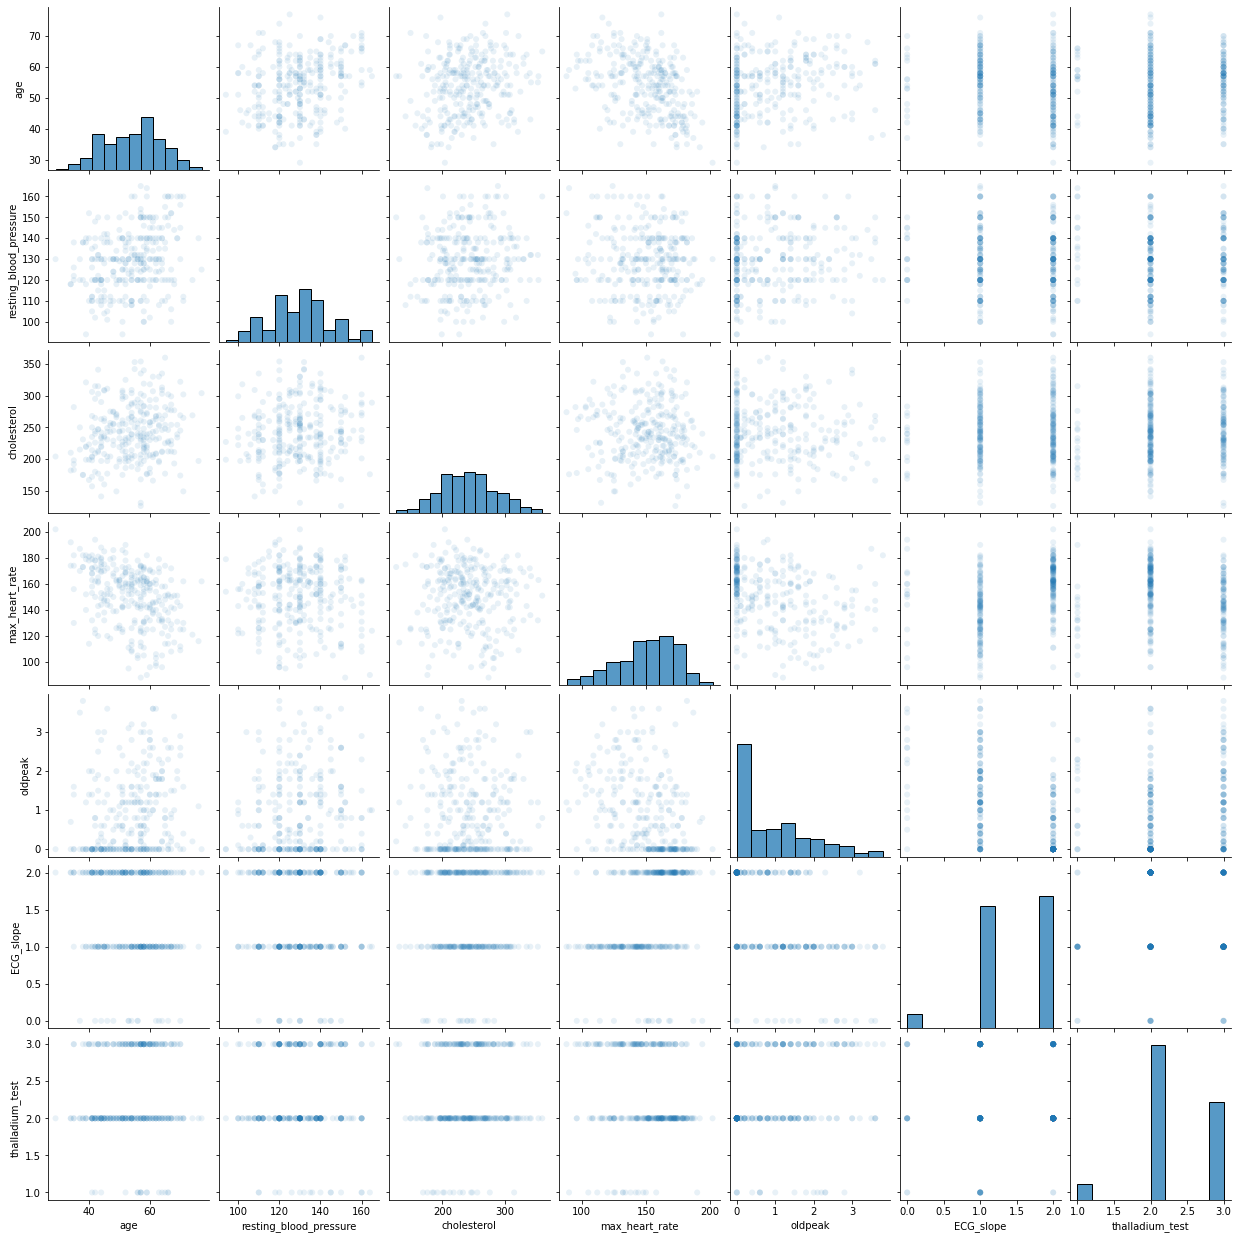

In [13]:
sns.pairplot(clean_data, vars=['age','resting_blood_pressure','cholesterol', \
                               'max_heart_rate','oldpeak','ECG_slope', \
                               'thalladium_test'],\
             plot_kws=dict(alpha=.1, edgecolor='none'))

From the above pairplot, it is evident there is minimal correlation between the variables. However, it does seem as though there is a slight negative correlation between age and max_heart_rate. First, we must ensure that our target variable is separated from our features.

In [14]:
#Separate our features from our target

X = clean_data.loc[:,['age','resting_blood_pressure','cholesterol', \
                               'max_heart_rate','oldpeak','ECG_slope', \
                               'thalladium_test']]

y = clean_data['output']

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 302
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     277 non-null    int64  
 1   resting_blood_pressure  277 non-null    int64  
 2   cholesterol             277 non-null    int64  
 3   max_heart_rate          277 non-null    int64  
 4   oldpeak                 277 non-null    float64
 5   ECG_slope               277 non-null    int64  
 6   thalladium_test         277 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 25.4 KB


There are some interaction effects in our data. One that could be analyzed is higher _'resting_blood_pressure'_ per higher _'cholesterol'_.

In [17]:
X2 = X.copy()

# multiplicative interaction
X2['rbp_x_chol'] = X2['resting_blood_pressure'] * X2['cholesterol']

Let us also create features that capture where a feature lies relative to the members of the category it belongs to. The code below accomplishes this task.

In [18]:
def add_deviation_feature(X, feature, category):
    
    # temp groupby object
    category_gb = X.groupby(category)[feature]
    
    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())
    
    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std 
    X[feature + '_Dev_' + category] = deviation_feature  

We will use this function to create one derivation features. This feature will allow us to find the correlation between the _'max_heart_rate'_ and _'cholesterol'_. Afterwards, we check our final output.

In [19]:
X3 = X2.copy()

X3['max_heart_rate'] = original_data['max_heart_rate']
add_deviation_feature(X3, 'cholesterol', 'max_heart_rate')

In [20]:
X3

,age,resting_blood_pressure,cholesterol,max_heart_rate,oldpeak,ECG_slope,thalladium_test,rbp_x_chol,cholesterol_Dev_max_heart_rate
0,63,145,233,150,2.3,0,1,33785,0.389518
1,37,130,250,187,3.5,0,2,32500,NaN
2,41,130,204,172,1.4,2,2,26520,-1.187756
3,56,120,236,178,0.8,2,2,28320,-0.126716
4,57,120,354,163,0.6,2,2,42480,1.977839
...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,1,3,33740,0.707107
299,45,110,264,132,1.2,1,3,29040,0.153247
300,68,144,193,141,3.4,1,3,27792,-1.153820
301,57,130,131,115,1.2,1,3,17030,-0.707107


In [27]:
clean_data

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,resting_ECG,max_heart_rate,exercise_induced_angina,oldpeak,ECG_slope,coronary_artery_abnormality,thalladium_test,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


---
# HYPOTHESIS TESTING
---

We need to generate three hypotheses about the data.

1. Null: Those with cholesterol greater than 235 are at greater risk of heart attack.

    Alternative: Those with cholesterol less than 235 are at greater risk of heart attack
    
2. Null: Those at most risk of heart attack are greater than 65.

    Alternative: Those at most risk of heart attack are less than or equal to 65.
    
3. Null: If I randomly selected 50 people, the true rate of those over 55 at most risk of heart attack is 0.6.

    Alternative: If I randomly selected 50 people, the true rate of those over 55 at most risk of heart attack is greater than 0.6.


We will conduct our formal significance test on Number 3. If our null hypothesis is correct, then we have a binomially distributed test statistic with parameters `n = 50` and `p = 0.5`. To perform this binomial distribution, assuming we are testing that 34 of these people are over 55, we will use the `binom` functionality from `scipy`.

In [26]:
prob = 1 - binom.cdf(33, 50, 0.6)

print(str(round(prob*100, 1))+"%")

15.6%


The probability of 34 or more of those people in the group at risk of heart attack (assuming over the age of 55) is 15.6%.